# **Problem 1**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [2]:
#data loading
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

In [3]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#data scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#define kernels to test
kernels = ['linear', 'poly', 'rbf']
results = {kernel: [] for kernel in kernels}

In [6]:
for kernel in kernels:
  for k in range(1, X_train.shape[1] + 1):
    #applying pca
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    #training svm model with specified kernel
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_pca, y_train)
    #prediction
    y_pred = svm_model.predict(X_test_pca)
    #performance metric
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    #storing results for this kernel and k value
    results[kernel].append((k, accuracy, precision, recall))

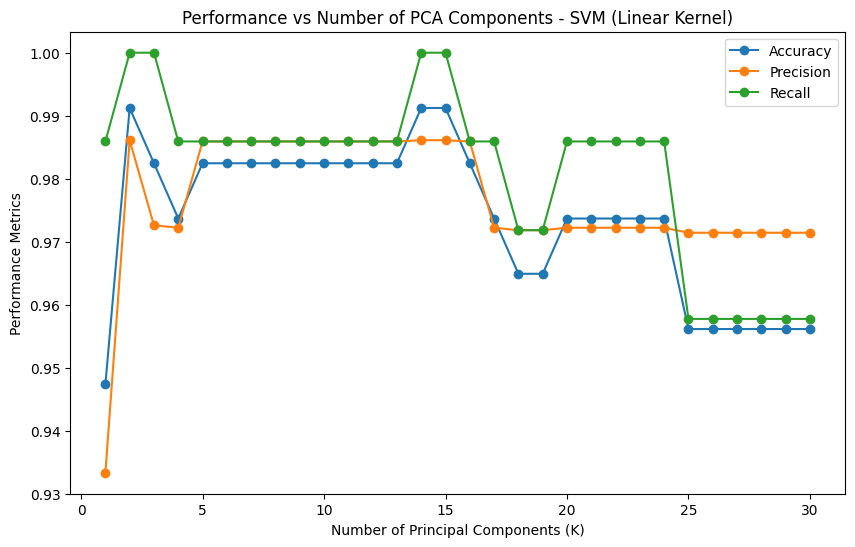

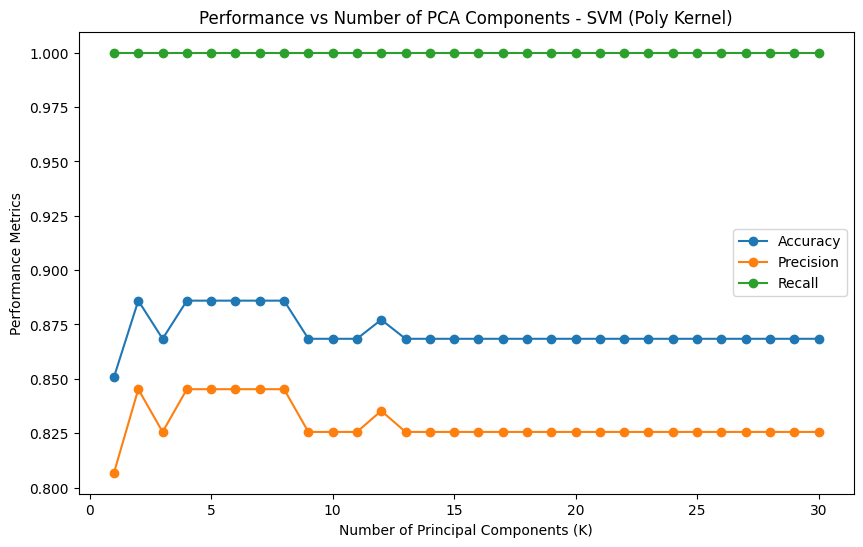

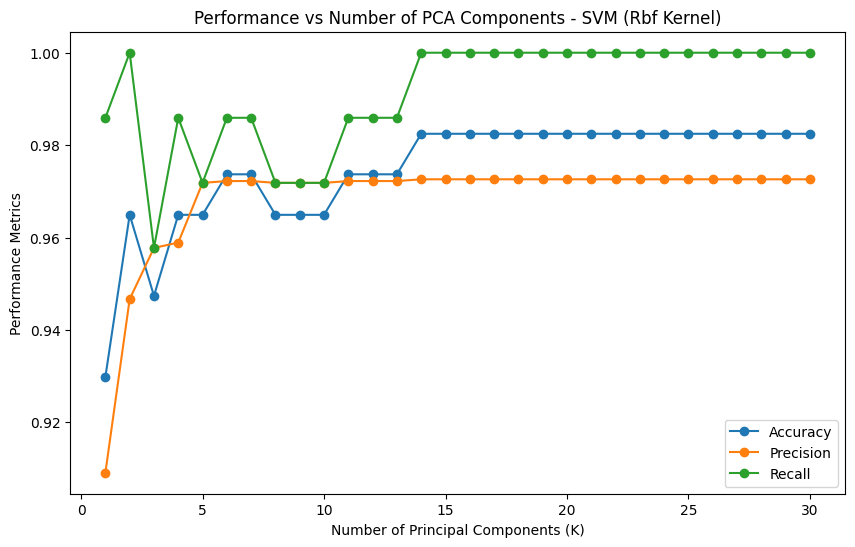

In [7]:
#plotting results for each kernel
for kernel in kernels:
  kernel_results = np.array(results[kernel])
  plt.figure(figsize=(10, 6))
  plt.plot(kernel_results[:, 0], kernel_results[:, 1], label='Accuracy', marker='o')
  plt.plot(kernel_results[:, 0], kernel_results[:, 2], label='Precision', marker='o')
  plt.plot(kernel_results[:, 0], kernel_results[:, 3], label='Recall', marker='o')
  plt.xlabel('Number of Principal Components (K)')
  plt.ylabel('Performance Metrics')
  plt.title(f'Performance vs Number of PCA Components - SVM ({kernel.capitalize()} Kernel)')
  plt.legend()
  plt.show()


In [8]:
#identifying best results for each kernel
for kernel in kernels:
  best_k, best_accuracy, best_precision, best_recall = max(results[kernel], key=lambda x: x[1])
  print(f"Best results for {kernel} kernel: K={best_k}, Accuracy={best_accuracy:.2f}, Precision={best_precision:.2f}, Recall={best_recall:.2f}")

Best results for linear kernel: K=2, Accuracy=0.99, Precision=0.99, Recall=1.00
Best results for poly kernel: K=2, Accuracy=0.89, Precision=0.85, Recall=1.00
Best results for rbf kernel: K=14, Accuracy=0.98, Precision=0.97, Recall=1.00


# Problem **2**

In [9]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#loading data
file_path = "/content/drive/MyDrive/Class/Intro-to-ML-main/Datasets/Housing.csv"
housing_data = pd.read_csv(file_path)
housing_data.head( )

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
#selecting features and target
X = housing_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
                  'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = housing_data['price']

In [15]:
#binary conversion (1 or 0)
columns_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
X.loc[:, columns_to_convert] = (X[columns_to_convert] == 'yes').astype(int)

In [16]:
#splitting 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#scale target variable
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train).ravel()
y_test = scaler_y.transform(y_test).ravel()

In [19]:
#pca
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [20]:
#define kernels to test
svr_rbf = SVR(kernel='rbf', C=1000, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1000)
svr_poly = SVR(kernel='poly', C=1000, degree=2)

In [21]:
#train and make prediciton
y_rbf_pred = svr_rbf.fit(X_train, y_train).predict(X_test)
y_lin_pred = svr_lin.fit(X_train, y_train).predict(X_test)
y_poly_pred = svr_poly.fit(X_train, y_train).predict(X_test)

In [22]:
#evaluate
mse_rbf = mean_squared_error(y_test, y_rbf_pred)
r2_rbf = r2_score(y_test, y_rbf_pred)
mse_lin = mean_squared_error(y_test, y_lin_pred)
r2_lin = r2_score(y_test, y_lin_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"RBF Kernel - MSE: {mse_rbf:.2f}, R2: {r2_rbf:.2f}")
print(f"Linear Kernel - MSE: {mse_lin:.2f}, R2: {r2_lin:.2f}")
print(f"Polynomial Kernel - MSE: {mse_poly:.2f}, R2: {r2_poly:.2f}")

RBF Kernel - MSE: 1.53, R2: 0.07
Linear Kernel - MSE: 0.63, R2: 0.62
Polynomial Kernel - MSE: 0.81, R2: 0.51


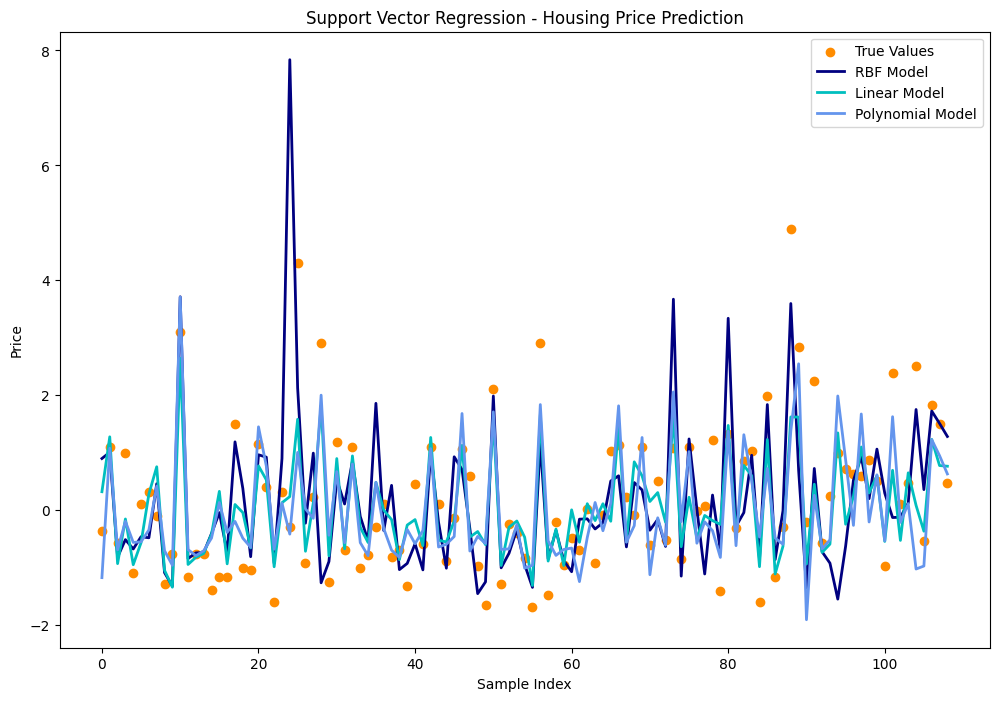

In [23]:
#plotting
plt.figure(figsize=(12, 8))
plt.scatter(range(len(y_test)), y_test, color='darkorange', label='True Values')
plt.plot(range(len(y_test)), y_rbf_pred, color='navy', lw=2, label='RBF Model')
plt.plot(range(len(y_test)), y_lin_pred, color='c', lw=2, label='Linear Model')
plt.plot(range(len(y_test)), y_poly_pred, color='cornflowerblue', lw=2, label='Polynomial Model')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Support Vector Regression - Housing Price Prediction')
plt.legend()
plt.show()

In [24]:
#hyperparameter tuning using randomizedsearchCV
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2, 3, 4]
}
random_search = RandomizedSearchCV(SVR(), param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [2, 3, 4],
                                        'gamma': [0.01, 0.1, 1, 10],
                                        'kernel': ['rbf', 'linear', 'poly']},
                   random_state=42, scoring='neg_mean_squared_error')

In [25]:
#best model from randomizesearch
best_svr = random_search.best_estimator_
y_best_pred = best_svr.predict(X_test_pca)

#evaluate the best model
mse_best = mean_squared_error(y_test, y_best_pred)
r2_best = r2_score(y_test, y_best_pred)
print(f"Best SVR Model - MSE: {mse_best:.2f}, R2: {r2_best:.2f}")

Best SVR Model - MSE: 0.66, R2: 0.60
